In [1]:
import numpy as np

In [2]:
data = np.load('./data/dataset.npz')
np.unique(data['labels'])

array([0, 1, 2, 3, 4, 5])

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_images, test_images, train_labels, test_labels = train_test_split(data['data'], data['labels'], test_size=0.7, stratify=data['labels'])

In [5]:
len(test_labels), len(test_images), len(train_images), len(train_labels)

(2100, 2100, 900, 900)

In [6]:
train_images.shape

(900, 50, 370)

In [7]:
import matplotlib.pyplot as plt

In [8]:
index = 22
item = train_images[index]
print('Result:', train_labels[index])

Result: 3


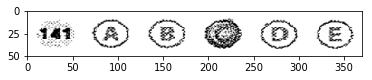

In [9]:
plt.imshow(item, cmap=plt.cm.binary_r)
plt.show()

In [10]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [11]:
train_images = train_images.reshape((900, 50, 370, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((2100, 50, 370, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 370, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=6, batch_size=64, validation_data=(test_images, test_labels))

Train on 900 samples, validate on 2100 samples
Epoch 1/6
900/900 [==============================] - 43s - loss: 1.8241 - acc: 0.5489 - val_loss: 0.4066 - val_acc: 0.8719
Epoch 2/6
900/900 [==============================] - 43s - loss: 0.1278 - acc: 0.9711 - val_loss: 0.0208 - val_acc: 0.9971
Epoch 3/6
900/900 [==============================] - 43s - loss: 0.0896 - acc: 0.9689 - val_loss: 1.2398 - val_acc: 0.4700
Epoch 4/6
900/900 [==============================] - 43s - loss: 0.2737 - acc: 0.9022 - val_loss: 0.0104 - val_acc: 0.9986
Epoch 5/6
900/900 [==============================] - 43s - loss: 0.0105 - acc: 0.9967 - val_loss: 0.0062 - val_acc: 0.9990
Epoch 6/6
900/900 [==============================] - 43s - loss: 0.0035 - acc: 0.9989 - val_loss: 0.0012 - val_acc: 1.0000


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

2100/2100 [==============================] - 18s    


In [15]:
test_acc

1.0